In [ ]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
model=load_model("/content/drive/MyDrive/model_checkpoint.hdf5")

Enter Location of Image to predict: /content/WhatsApp Image 2022-06-05 at 10.25.57 PM.jpeg
[[0.99985504]]
{}
Prediction:  Fake


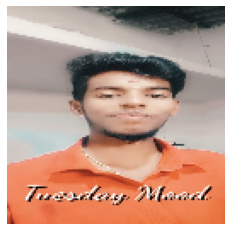

In [ ]:
from PIL import Image
from PIL.Image import Exif
from PIL.ExifTags import TAGS
Dict={}

def get_exif(file_name) -> Exif:
    image: Image.Image = Image.open(file_name)
    return image.getexif()

def get_exif_ifd(exif):
    for key, value in TAGS.items():
        if value == "ExifOffset":
            break
    info = exif.get_ifd(key)
    for key,value in info.items():
          if(TAGS.get(key, key)=="DateTimeOriginal" or TAGS.get(key, key)=="DateTimeDigitized"):
              Dict.update({TAGS.get(key, key):value})
    return Dict
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (128,128))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    return result
img = input("Enter Location of Image to predict: ")
result1 = ImagePrediction(img)
print(result1)

exif = get_exif(img)
get_exif_ifd(exif)
print(Dict)
if (len(Dict)<2):
  if (result1[0][0] == 1):
    predictions = 'Real'
  else:
    predictions = 'Fake'
else:
  if result1[0][0] == 1 and (Dict["DateTimeOriginal"]==Dict["DateTimeDigitized"]):
        predictions = 'Real'
  else:
    predictions = 'Fake'
print('Prediction: ',predictions)